# MTH-IDS: A Multi-Tiered Hybrid Intrusion Detection System for Internet of Vehicles
This is the code for the paper entitled "[**MTH-IDS: A Multi-Tiered Hybrid Intrusion Detection System for Internet of Vehicles**](https://arxiv.org/pdf/2105.13289.pdf)" accepted in IEEE Internet of Things Journal.  
Authors: Li Yang (liyanghart@gmail.com), Abdallah Moubayed, and Abdallah Shami  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

L. Yang, A. Moubayed, and A. Shami, “MTH-IDS: A Multi-Tiered Hybrid Intrusion Detection System for Internet of Vehicles,” IEEE Internet of Things Journal, 2021.

## Import libraries

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from scipy.io import arff

## Read the NSL-KDD dataset


In [11]:
#Read dataset
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df = pd.read_csv('C:/Users/13197/Desktop/Machine learning/nsl-kdd/KDDTrain+.csv', header=None, index_col=False, names=columns)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [12]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [13]:
df.attack.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

### Preprocessing (normalization and padding values)

In [14]:
# Z-score normalization
features = df.dtypes[df.dtypes != 'object'].index
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df = df.fillna(0)

### Data sampling
Due to the space limit of GitHub files and the large size of network traffic data, we sample a small-sized subset for model learning using **k-means cluster sampling**

In [55]:
labelencoder = LabelEncoder()
for columns in df.dtypes[df.dtypes == 'object'].index:
    df[columns] = labelencoder.fit_transform(df[columns])

In [56]:
df.attack.value_counts()

11    67343
9     41214
17     3633
5      3599
15     2931
18     2646
10     1493
0       956
20      892
21      890
14      201
3        53
1        30
22       20
6        18
4        11
16       10
7         9
2         8
8         7
13        4
12        3
19        2
Name: attack, dtype: int64

In [59]:
# retain the minority class instances and sample the majority class instances
df_minor = df[(df['attack']==7)|(df['attack']==2)|(df['attack']==8)|(df['attack']==13)|(df['attack']==12)|(df['attack']==19)]
df_major = df.drop(df_minor.index)

In [61]:
X = df_major.drop(['attack'],axis=1) 
y = df_major['attack'].values.reshape(-1,1)
y=np.ravel(y)

In [63]:
# use k-means to cluster the data samples and select a proportion of data from each cluster
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

In [64]:
klabel=kmeans.labels_
df_major['klabel']=klabel

In [65]:
df_major['klabel'].value_counts()

226    3946
739    2396
81     1830
686    1382
656    1212
       ... 
259       3
98        3
269       3
988       2
411       1
Name: klabel, Length: 997, dtype: int64

In [67]:
cols = list(df_major)
cols.insert(41, cols.pop(cols.index('attack')))
df_major = df_major.loc[:, cols]

In [68]:
df_major

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,klabel
0,-0.110249,1,20,9,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.280281,0.069972,-0.289102,-0.639529,-0.624868,-0.224532,-0.376386,11,0.216425,996
1,-0.110249,2,44,9,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,2.736841,2.367728,-0.289102,-0.639529,-0.624868,-0.387633,-0.376386,11,-1.965549,710
2,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.174417,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,9,-0.219969,881
3,-0.110249,1,24,9,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.439076,-0.383107,0.066252,-0.572081,-0.602430,-0.387633,-0.345083,11,0.652820,686
4,-0.110249,1,24,9,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.439076,-0.480195,-0.289102,-0.639529,-0.624868,-0.387633,-0.376386,11,0.652820,767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.121485,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,9,0.216425,361
125969,-0.107177,2,49,9,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.386144,-0.447832,-0.289102,-0.639529,-0.624868,-0.387633,-0.376386,11,0.652820,235
125970,-0.110249,1,54,9,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.121485,-0.480195,-0.289102,0.979234,-0.624868,-0.355013,-0.376386,11,-0.656364,159
125971,-0.110249,1,30,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.174417,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,9,0.216425,829


In [69]:
def typicalSampling(group):
    name = group.name
    frac = 0.008
    return group.sample(frac=frac)

result = df_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [70]:
result['attack'].value_counts()

11    506
9     320
5      27
17     23
15     21
18     21
10     12
0       7
21      6
20      5
3       1
Name: attack, dtype: int64

In [71]:
result

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,klabel
46019,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.068553,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,9,0.652820,2
67555,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.174417,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,9,0.652820,2
17781,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.068553,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,9,0.652820,2
85717,-0.110249,2,12,9,-0.007755,-0.004899,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.439076,-0.447832,-0.289102,-0.639529,-0.624868,-0.387633,-0.376386,11,-0.656364,3
69948,-0.110249,2,12,9,-0.007755,-0.004907,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.439076,-0.480195,-0.289102,-0.639529,-0.624868,-0.387633,-0.376386,11,-0.656364,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86878,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.015621,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,9,0.652820,995
45579,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.227349,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,9,0.652820,995
15971,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.068553,-0.480195,-0.289102,1.608753,1.618949,-0.387633,-0.376386,9,0.652820,995
32784,-0.110249,1,20,9,-0.007736,-0.004919,-0.014089,-0.089486,-0.007736,-0.095075,...,-0.280281,0.069972,-0.289102,-0.617047,-0.624868,-0.387633,-0.376386,11,0.652820,996


In [72]:
result = result.drop(['klabel'],axis=1)
result = result.append(df_minor)

In [74]:
result.to_csv('C:/Users/13197/Desktop/Machine learning/nsl-kdd/KDDTrain+_rst.csv',index=0)

### split train set and test set

In [75]:
# df=pd.read_csv('C:/Users/13197/Desktop/Machine learning/nsl-kdd/KDDTrain+_rst.csv')

In [76]:
# X = df.drop(['attack'],axis=1).values
# y = df['attack'].values.reshape(-1,1)
# y=np.ravel(y)

In [77]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

## Feature engineering

### Feature selection by information gain

In [10]:
# from sklearn.feature_selection import mutual_info_classif
# importances = mutual_info_classif(X, y)

NameError: name 'X' is not defined

In [79]:
# calculate the sum of importance scores
# f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
# Sum = 0
# fs = []
# for i in range(0, len(f_list)):
#     Sum = Sum + f_list[i][0]
#     fs.append(f_list[i][1])

In [80]:
# select the important features from top to bottom until the accumulated importance reaches 90%
# f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
# Sum2 = 0
# fs = []
# for i in range(0, len(f_list2)):
#     Sum2 = Sum2 + f_list2[i][0]
#     fs.append(f_list2[i][1])
#     if Sum2>=0.9:
#         break        

In [81]:
# X_fs = df[fs].values

In [82]:
# X_fs.shape

(982, 24)

### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [83]:
# from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
# fcbf = FCBFK(k = 20)
# #fcbf.fit(X_fs, y)

In [84]:
# X_fss = fcbf.fit_transform(X_fs,y)

In [85]:
# X_fss.shape

(982, 20)

### Re-split train & test sets after feature selection

In [86]:
# X_train, X_test, y_train, y_test = train_test_split(X_fss,y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [87]:
# X_train.shape

(785, 20)

In [88]:
# pd.Series(y_train).value_counts()

11    409
9     254
5      21
15     19
18     17
17     17
10     10
7       7
0       6
21      6
2       4
8       4
20      4
12      2
13      2
19      2
3       1
dtype: int64

### SMOTE to solve class-imbalance

In [93]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE(n_jobs=-1,sampling_strategy={7:10,0:10,21:10,2:10,8:10,20:10,12:10,13:10,19:10,3:10})

In [94]:
# X_train, y_train = smote.fit_sample(X_train, y_train)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 6

In [95]:
pd.Series(y_train).value_counts()

11    409
9     254
5      21
15     19
18     17
17     17
10     10
7       7
0       6
21      6
2       4
8       4
20      4
12      2
13      2
19      2
3       1
dtype: int64

## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

#### Apply XGBoost

In [15]:
labelencoder = LabelEncoder()
for column in df.dtypes[df.dtypes == 'object'].index:
    df[column] = labelencoder.fit_transform(df[column])
x = df.drop(['attack'], axis=1).values
y = df['attack'].values
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 0)

Accuracy of XGBoost: 0.9982536217503473
Precision of XGBoost: 0.9977489965241805
Recall of XGBoost: 0.9982536217503473
F1-score of XGBoost: 0.9979857892484599
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       0.71      0.50      0.59        10
           2       0.00      0.00      0.00         2
           3       1.00      0.85      0.92        13
           4       0.00      0.00      0.00         3
           5       0.99      1.00      1.00       703
           6       1.00      1.00      1.00         4
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8259
          10       0.98      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       1.00      1.00      1.00         1
          14       1.00      0.98      0.99        41
          15       1.00      0.99      1.00       624
          16       0.00      0

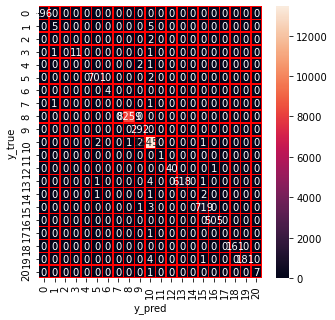

In [16]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of XGBoost using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [7]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [15:41<00:00, 47.07s/trial, best loss: -0.9990871204604088]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.9801145158439638, 'max_depth': 21.0, 'n_estimators': 75.0}


Accuracy of XGBoost: 0.9990871204604088
Precision of XGBoost: 0.998940947890031
Recall of XGBoost: 0.9990871204604088
F1-score of XGBoost: 0.9989937504038604
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       196
           1       0.91      1.00      0.95        10
           2       0.00      0.00      0.00         2
           3       1.00      0.85      0.92        13
           4       1.00      1.00      1.00         3
           5       1.00      0.99      0.99       703
           6       1.00      1.00      1.00         4
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8259
          10       0.98      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        41
          15       1.00      1.

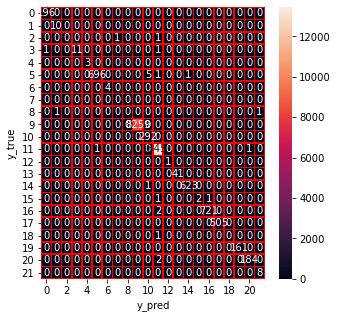

In [8]:
xg = xgb.XGBClassifier(learning_rate= 0.9801145158439638, n_estimators = 75, max_depth = 21)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [9]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

#### Apply RF

Accuracy of RF: 0.998809287557055
Precision of RF: 0.9986289282939149
Recall of RF: 0.998809287557055
F1-score of RF: 0.9986737426082106
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      0.60      0.75        10
           2       1.00      0.50      0.67         2
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00         3
           5       1.00      0.99      1.00       703
           6       0.75      0.75      0.75         4
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00      8259
          10       0.99      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        41
          15       1.00      1.00      1.00       624
          16       0.00      0.00      0.00         

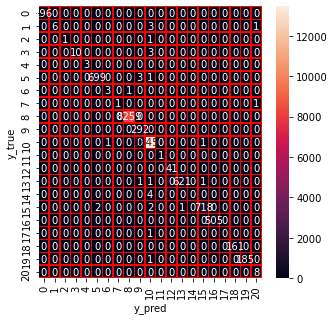

In [20]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of random forest using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [21]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [03:58<00:00, 11.91s/trial, best loss: -0.9987695971422902]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 14.0, 'max_features': 13.0, 'min_samples_leaf': 1.0, 'min_samples_split': 4.0, 'n_estimators': 35.0}


Accuracy of RF: 0.998571145068466
Precision of RF: 0.9981974970940021
Recall of RF: 0.998571145068466
F1-score of RF: 0.9983538986746042
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       0.83      0.50      0.62        10
           2       0.00      0.00      0.00         2
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00         3
           5       1.00      0.99      1.00       703
           6       1.00      0.75      0.86         4
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8259
          10       0.98      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       1.00      1.00      1.00         1
          14       1.00      0.98      0.99        41
          15       1.00      0.99      1.00       624
          16       0.00      0.00      0.00         

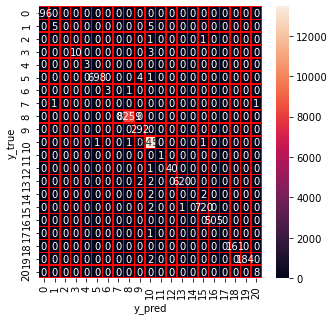

In [22]:
rf_hpo = RandomForestClassifier(n_estimators = 55, min_samples_leaf = 2, max_depth = 34, min_samples_split = 8, max_features = 18, criterion = 'gini')
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [14]:
rf_train=rf_hpo.predict(X_train)
rf_test=rf_hpo.predict(X_test)

#### Apply DT

Accuracy of DT: 0.9978964080174638
Precision of DT: 0.9980560713462066
Recall of DT: 0.9978964080174638
F1-score of DT: 0.997941678599504
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       0.73      0.80      0.76        10
           2       0.17      0.50      0.25         2
           3       0.91      0.77      0.83        13
           4       0.60      1.00      0.75         3
           5       0.99      0.99      0.99       703
           6       1.00      0.75      0.86         4
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00      8259
          10       0.99      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        41
          15       0.99      0.99      0.99       624
          16       0.75      0.75      0.75        

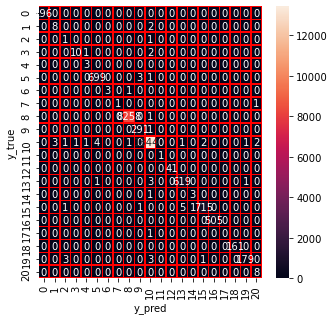

In [15]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of decision tree using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [16]:
# Hyperparameter optimization of decision tree
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = DecisionTreeClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("Decision tree: Hyperopt estimated optimum {}".format(best))

100%|██████████| 50/50 [00:23<00:00,  2.10trial/s, best loss: -0.9979757888469935]
Decision tree: Hyperopt estimated optimum {'criterion': 0, 'max_depth': 36.0, 'max_features': 15.0, 'min_samples_leaf': 1.0, 'min_samples_split': 7.0}


Accuracy of DT: 0.9968644572335781
Precision of DT: 0.9965950020531196
Recall of DT: 0.9968644572335781
F1-score of DT: 0.9966976550261363
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       196
           1       0.67      0.60      0.63        10
           2       0.00      0.00      0.00         2
           3       0.82      0.69      0.75        13
           4       0.50      0.67      0.57         3
           5       0.98      1.00      0.99       703
           6       1.00      0.50      0.67         4
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8259
          10       0.99      0.98      0.98       292
          11       1.00      1.00      1.00     13457
          12       0.00      0.00      0.00         1
          14       1.00      0.95      0.97        41
          15       0.99      0.99      0.99       

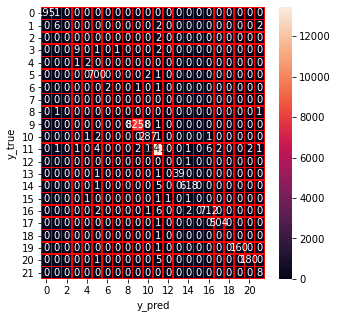

In [17]:
dt_hpo = DecisionTreeClassifier(min_samples_leaf = 1, max_depth = 36, min_samples_split = 7, max_features = 15, criterion = 'gini')
dt_hpo.fit(X_train,y_train)
dt_score=dt_hpo.score(X_test,y_test)
y_predict=dt_hpo.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [18]:
dt_train=dt_hpo.predict(X_train)
dt_test=dt_hpo.predict(X_test)

#### Apply ET

Accuracy of ET: 0.9986505258979956
Precision of ET: 0.9984270158987276
Recall of ET: 0.9986505258979956
F1-score of ET: 0.9984871757677917
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      0.60      0.75        10
           2       1.00      0.50      0.67         2
           3       1.00      0.69      0.82        13
           4       1.00      1.00      1.00         3
           5       0.99      0.99      0.99       703
           6       0.80      1.00      0.89         4
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00      8259
          10       0.99      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       0.00      0.00      0.00         1
          14       1.00      1.00      1.00        41
          15       1.00      1.00      1.00       624
          16       0.00      0.00      0.00       

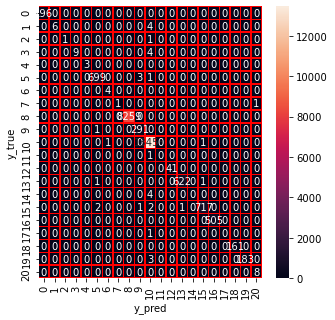

In [19]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of extra trees using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [20]:
# Hyperparameter optimization of extra trees
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = ExtraTreesClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 20, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [07:56<00:00, 23.81s/trial, best loss: -0.9987695971422902]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 23.0, 'max_features': 16.0, 'min_samples_leaf': 1.0, 'min_samples_split': 6.0, 'n_estimators': 169.0}


Accuracy of ET: 0.9987695971422902
Precision of ET: 0.9984596334935361
Recall of ET: 0.9987695971422902
F1-score of ET: 0.9985915903817792
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       0.88      0.70      0.78        10
           2       1.00      0.50      0.67         2
           3       1.00      0.77      0.87        13
           4       1.00      1.00      1.00         3
           5       1.00      0.99      1.00       703
           6       0.80      1.00      0.89         4
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8259
          10       0.98      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       0.00      0.00      0.00         1
          14       1.00      1.00      1.00        41
          15       1.00      1.00      1.00       624
          16       0.00      0.00      0.00       

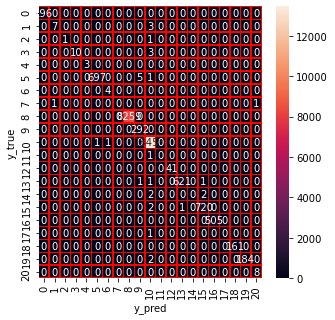

In [22]:
et_hpo = ExtraTreesClassifier(n_estimators = 169, min_samples_leaf = 1, max_depth = 23, min_samples_split = 6, max_features = 16, criterion = 'entropy')
et_hpo.fit(X_train,y_train) 
et_score=et_hpo.score(X_test,y_test)
y_predict=et_hpo.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [23]:
et_train=et_hpo.predict(X_train)
et_test=et_hpo.predict(X_test)

### Apply stacking

In [24]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,11,11,11,11
1,11,11,11,11
2,9,9,9,9
3,9,9,9,9
4,11,11,11,11


In [25]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [26]:
dt_train.shape

(100778, 1)

In [19]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

NameError: name 'dt_train' is not defined

Accuracy of Stacking: 0.998809287557055
Precision of Stacking: 0.9986517536034587
Recall of Stacking: 0.998809287557055
F1-score of Stacking: 0.9986892080232626
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       0.88      0.70      0.78        10
           2       1.00      0.50      0.67         2
           3       1.00      0.69      0.82        13
           4       1.00      1.00      1.00         3
           5       0.99      0.99      0.99       703
           6       1.00      1.00      1.00         4
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8259
          10       0.98      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       0.00      0.00      0.00         1
          14       1.00      1.00      1.00        41
          15       1.00      1.00      1.00       624
          16       1.00     

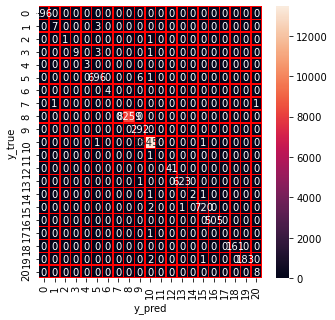

In [28]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter optimization (HPO) of the stacking ensemble model (XGBoost) using Bayesian optimization with tree-based Parzen estimator (BO-TPE)
Based on the GitHub repo for HPO: https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms

In [29]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),

    }
    clf = xgb.XGBClassifier( **params)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 5),
    'max_depth': hp.quniform('max_depth', 4, 100, 1),
    'learning_rate': hp.normal('learning_rate', 0.01, 0.9),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [03:27<00:00, 10.37s/trial, best loss: -0.9988489779718198]
XGBoost: Hyperopt estimated optimum {'learning_rate': 0.07122670299661384, 'max_depth': 11.0, 'n_estimators': 55.0}


Accuracy of XGBoost: 0.9988489779718198
Precision of XGBoost: 0.9986925033944979
Recall of XGBoost: 0.9988489779718198
F1-score of XGBoost: 0.998729176192679
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       0.88      0.70      0.78        10
           2       1.00      0.50      0.67         2
           3       1.00      0.69      0.82        13
           4       1.00      1.00      1.00         3
           5       0.99      0.99      0.99       703
           6       1.00      1.00      1.00         4
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8259
          10       0.98      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       0.00      0.00      0.00         1
          14       0.98      1.00      0.99        41
          15       1.00      1.00      1.00       624
          16       1.00      0.

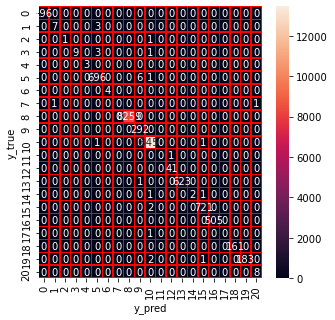

In [30]:
xg = xgb.XGBClassifier(learning_rate= 0.07122670299661384, n_estimators = 55, max_depth = 11)
xg.fit(x_train,y_train)
xg_score=xg.score(x_test,y_test)
y_predict=xg.predict(x_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## HPO Algorithm 6: PSO
Partical swarm optimization (PSO): Each particle in a swarm communicates with other particles to detect and update the current global optimum in each iteration until the final optimum is detected.

**Advantages:**
* Efficient with all types of HPs.
* Enable parallelization. 

**Disadvantages:**  
* Require proper initialization.

In [26]:
#Random Forest
import optunity
import optunity.metrics

data=x
labels=y.tolist()
# Define the hyperparameter configuration space
search = {
    'n_estimators': [10, 100],
    'max_features': [1, 64],
    'max_depth': [5,50],
    "min_samples_split":[2,11],
    "min_samples_leaf":[1,11],
    "criterion":[0,1]
         }
# Define the objective function
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,n_estimators=None, max_features=None,max_depth=None,min_samples_split=None,min_samples_leaf=None,criterion=None):
    # fit the model
    if criterion<0.5:
        cri='gini'
    else:
        cri='entropy'
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri,
                                  )
    #predictions = model.predict(x_test)
    scores=np.mean(cross_val_score(model, x, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
    #return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return scores#optunity.metrics.accuracy(y_test, predictions)

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'n_estimators': 85.5419921875, 'max_features': 14.50439453125, 'max_depth': 14.86572265625, 'min_samples_split': 7.69970703125, 'min_samples_leaf': 1.0830078125, 'criterion': 0.58740234375}
Accuracy:0.9990236002953014


Accuracy of RF: 0.9977773367731693
Precision of RF: 0.9972310043975305
Recall of RF: 0.9977773367731693
F1-score of RF: 0.9974830825139966
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       196
           1       0.71      0.50      0.59        10
           2       0.00      0.00      0.00         2
           3       1.00      0.77      0.87        13
           4       0.00      0.00      0.00         3
           5       1.00      1.00      1.00       703
           6       1.00      0.75      0.86         4
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8259
          10       0.98      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       0.00      0.00      0.00         1
          14       1.00      0.98      0.99        41
          15       1.00      0.99      0.99       624
          16       0.00      0.00      0.00       

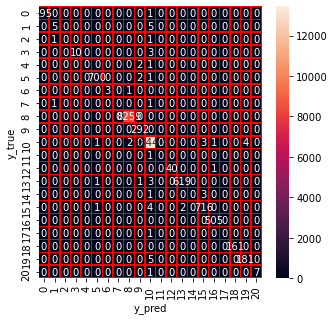

In [29]:
rf_hpo = RandomForestClassifier(n_estimators = 85, min_samples_leaf = 7, max_depth = 14, min_samples_split = 7, max_features = 28, criterion = "gini")
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## HPO Algorithm 7: Genetic Algorithm
Genetic algorithms detect well-performing hyper-parameter combinations in each generation, and pass them to the next generation until the best-performing combination is identified.

**Advantages:**
* Efficient with all types of HPs.
* Not require good initialization.
 

**Disadvantages:**  
* Poor capacity for parallelization.

### Using TPOT

In [30]:
#Random Forest
from tpot import TPOTClassifier
# Define the hyperparameter configuration space
parameters = {
        'n_estimators': range(20,200),
    "max_features":range(1,64),
    'max_depth': range(10,100),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    "criterion":['gini','entropy']
             }
# Set the hyperparameters of GA                 
ga2 = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 3, scoring = 'accuracy')
ga2.fit(x, y)

1 operators have been imported by TPOT.
                                                                                  
Generation 1 - Current Pareto front scores:
                                                                                 
-1	0.9987140101450311	RandomForestClassifier(CombineDFs(input_matrix, input_matrix), RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_depth=98, RandomForestClassifier__max_features=14, RandomForestClassifier__min_samples_leaf=4, RandomForestClassifier__min_samples_split=9, RandomForestClassifier__n_estimators=195)
                                                                                 
-2	0.9988410214887318	RandomForestClassifier(RandomForestClassifier(input_matrix, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_depth=89, RandomForestClassifier__max_features=5, RandomForestClassifier__min_samples_leaf=1, RandomForestClassifier__min_samples_split=2, RandomForestClassifier__n_estimators=29), 

TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': range(10, 100),
                                                                        'max_features': range(1, 64),
                                                                        'min_samples_leaf': range(1, 11),
                                                                        'min_samples_split': range(2, 11),
                                                                        'n_estimators': range(20, 200)}},
               cv=3, early_stop=5, generations=3, offspring_size=5,
               population_size=10, scoring='accuracy', verbosity=3)

Accuracy of RF: 0.9985314546537011
Precision of RF: 0.9981161068214854
Recall of RF: 0.9985314546537011
F1-score of RF: 0.9982947013512334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       0.83      0.50      0.62        10
           2       0.00      0.00      0.00         2
           3       1.00      0.85      0.92        13
           4       1.00      0.67      0.80         3
           5       1.00      0.99      1.00       703
           6       1.00      0.75      0.86         4
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00      8259
          10       0.98      1.00      0.99       292
          11       1.00      1.00      1.00     13457
          12       0.00      0.00      0.00         1
          14       1.00      1.00      1.00        41
          15       1.00      0.99      1.00       624
          16       0.00      0.00      0.00       

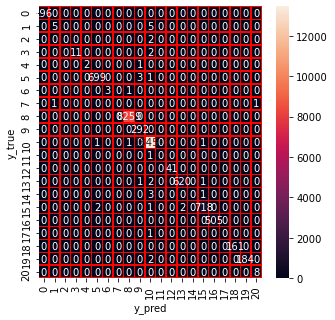

In [33]:
rf_hpo = RandomForestClassifier(criterion="gini", max_depth=56, max_features=18, min_samples_leaf=4, min_samples_split=8, n_estimators=137)
rf_hpo.fit(X_train,y_train)
rf_score=rf_hpo.score(X_test,y_test)
y_predict=rf_hpo.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Anomaly-based IDS

### Generate the port-scan datasets for unknown attack detection

In [131]:
df=pd.read_csv('./data/CICIDS2017_sample_km.csv')

In [132]:
df.Label.value_counts()

0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: Label, dtype: int64

In [144]:
df1 = df[df['Label'] != 5]
df1['Label'][df1['Label'] > 0] = 1
df1.to_csv('./data/CICIDS2017_sample_km_without_portscan.csv',index=0)

In [145]:
df2 = df[df['Label'] == 5]
df2['Label'][df2['Label'] == 5] = 1
df2.to_csv('./data/CICIDS2017_sample_km_portscan.csv',index=0)

### Read the generated datasets for unknown attack detection

In [67]:
df1 = pd.read_csv('./data/CICIDS2017_sample_km_without_portscan.csv')
df2 = pd.read_csv('./data/CICIDS2017_sample_km_portscan.csv')

In [68]:
features = df1.drop(['Label'],axis=1).dtypes[df1.dtypes != 'object'].index
df1[features] = df1[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df2[features] = df2[features].apply(
    lambda x: (x - x.mean()) / (x.std()))
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [69]:
df1.Label.value_counts()

0    18225
1     7320
Name: Label, dtype: int64

In [70]:
df2.Label.value_counts()

1    1255
Name: Label, dtype: int64

In [71]:
df2p=df1[df1['Label']==0]
df2pp=df2p.sample(n=None, frac=1255/18225, replace=False, weights=None, random_state=None, axis=0)
df2=pd.concat([df2, df2pp])

In [72]:
df2.Label.value_counts()

1    1255
0    1255
Name: Label, dtype: int64

In [73]:
df = df1.append(df2)

In [74]:
X = df.drop(['Label'],axis=1) .values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
pd.Series(y).value_counts()

0    19480
1     8575
dtype: int64

### Feature engineering (IG, FCBF, and KPCA)

#### Feature selection by information gain (IG)

In [75]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y)

In [76]:
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [77]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        

In [78]:
X_fs = df[fs].values

In [79]:
X_fs.shape

(28055, 50)

In [80]:
X_fs

array([[-0.34612159, -0.51326791, -0.44364535, ..., -0.11333586,
        -0.13353417, -0.05349902],
       [-0.3443274 , -0.51326791, -0.44364535, ..., -0.11333586,
        -0.13353417, -0.05349902],
       [-0.3443274 , -0.51326791, -0.44364535, ..., -0.11333586,
        -0.13353417, -0.05349902],
       ...,
       [-0.36859622, -0.20454057, -0.32295149, ..., -0.11333586,
        -0.13353417, -0.05349902],
       [-0.3561313 ,  0.63721854,  0.36583358, ..., -0.11333586,
        -0.13353417,  0.00459227],
       [ 2.7318634 , -0.53347551, -0.44364535, ..., -0.11333586,
        -0.13353417, -0.05349902]])

#### Feature selection by Fast Correlation Based Filter (FCBF)

The module is imported from the GitHub repo: https://github.com/SantiagoEG/FCBF_module

In [81]:
from FCBF_module import FCBF, FCBFK, FCBFiP, get_i
fcbf = FCBFK(k = 20)
#fcbf.fit(X_fs, y)

In [82]:
X_fss = fcbf.fit_transform(X_fs,y)

In [83]:
X_fss.shape

(28055, 20)

In [84]:
X_fss

array([[-0.34612159, -0.53319222, -0.34935843, ..., -0.42229765,
        -0.2803002 , -0.41947688],
       [-0.3443274 , -0.54906516, -0.34935843, ..., -0.42229765,
        -0.2803002 , -0.41947688],
       [-0.3443274 , -0.55544206, -0.34935843, ..., -0.42229765,
        -0.2803002 , -0.41947688],
       ...,
       [-0.36859622, -0.56375976, -0.34935843, ..., -0.42229765,
        -0.2803002 , -0.32403604],
       [-0.3561313 ,  0.00413109, -0.33807808, ..., -0.41021078,
        -0.27174505,  0.36453998],
       [ 2.7318634 , -0.53929186, -0.34935843, ..., -0.42229765,
        -0.2803002 , -0.42271216]])

####  kernel principal component analysis (KPCA)

In [123]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
kpca.fit(X_fss, y)
X_kpca = kpca.transform(X_fss)

# from sklearn.decomposition import PCA
# kpca = PCA(n_components = 10)
# kpca.fit(X_fss, y)
# X_kpca = kpca.transform(X_fss)

### Train-test split after feature selection

In [86]:
X_train = X_kpca[:len(df1)]
y_train = y[:len(df1)]
X_test = X_kpca[len(df1):]
y_test = y[len(df1):]

### Solve class-imbalance by SMOTE

In [87]:
pd.Series(y_train).value_counts()

0    18225
1     7320
dtype: int64

In [88]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={1:18225})
X_train, y_train = smote.fit_sample(X_train, y_train)

In [89]:
pd.Series(y_train).value_counts()

1    18225
0    18225
dtype: int64

In [90]:
pd.Series(y_test).value_counts()

1    1255
0    1255
dtype: int64

### Apply the cluster labeling (CL) k-means method

In [91]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN,MeanShift
from sklearn.cluster import SpectralClustering,AgglomerativeClustering,AffinityPropagation,Birch,MiniBatchKMeans,MeanShift 
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import classification_report
from sklearn import metrics

In [124]:
def CL_kmeans(X_train, X_test, y_train, y_test,n,b=100):
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y_test,result2)
    print(str(acc))
    print(cm)

In [94]:
CL_kmeans(X_train, X_test, y_train, y_test, 8)

              precision    recall  f1-score   support

           0       0.58      0.69      0.63      1255
           1       0.62      0.51      0.56      1255

    accuracy                           0.60      2510
   macro avg       0.60      0.60      0.60      2510
weighted avg       0.60      0.60      0.60      2510

0.5984063745019921
[[864 391]
 [617 638]]


### Hyperparameter optimization of CL-k-means
Tune "k"

In [120]:
#Hyperparameter optimization by BO-GP
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn import metrics

space  = [Integer(2, 50, name='n_clusters')]
@use_named_args(space)
def objective(**params):
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    cm=metrics.accuracy_score(y_test,result2)
    print(str(n)+" "+str(cm))
    return (1-cm)
from skopt import gp_minimize
import time
t1=time.time()
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
t2=time.time()
print(t2-t1)
print("Best score=%.4f" % (1-res_gp.fun))
print("""Best parameters: n_clusters=%d""" % (res_gp.x[0]))

30 0.6972111553784861
43 0.7127490039840637
43 0.399203187250996
43 0.47051792828685257
32 0.653784860557769
20 0.34860557768924305
16 0.9195219123505977
5 0.4370517928286853
15 0.6729083665338645
25 0.7063745019920319
2 0.47808764940239046
50 0.4199203187250996


C:\Program Files\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


2 0.47768924302788845


C:\Program Files\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


50 0.39282868525896414
17 0.42828685258964144


C:\Program Files\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


2 0.47768924302788845


C:\Program Files\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


2 0.47768924302788845


C:\Program Files\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


16 0.6992031872509961


C:\Program Files\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


16 0.3737051792828685


C:\Program Files\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


50 0.6250996015936255
9.127083539962769
Best score=0.9195
Best parameters: n_clusters=16


In [121]:
#Hyperparameter optimization by BO-TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

def objective(params):
    params = {
        'n_clusters': int(params['n_clusters']), 
    }
    km_cluster = MiniBatchKMeans(batch_size=100, **params)
    n=params['n_clusters']
    
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    score=metrics.accuracy_score(y_test,result2)
    print(str(params['n_clusters'])+" "+str(score))
    return {'loss':1-score, 'status': STATUS_OK }
space = {
    'n_clusters': hp.quniform('n_clusters', 2, 50, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

23 0.34422310756972113
15 0.6685258964143427
46 0.450199203187251
15 0.4896414342629482
29 0.6824701195219124
36 0.3888446215139442
22 0.35776892430278884
25 0.34860557768924305
42 0.41832669322709165
27 0.47051792828685257
26 0.39402390438247015
25 0.6824701195219124
33 0.3848605577689243
19 0.7191235059760956
6 0.5824701195219123
21 0.6697211155378486
24 0.451394422310757
37 0.4681274900398406
14 0.47250996015936253
21 0.8434262948207172
100%|███████████████████████████████████████████████| 20/20 [00:06<00:00,  2.87trial/s, best loss: 0.15657370517928282]
Random Forest: Hyperopt estimated optimum {'n_clusters': 21.0}


In [122]:
CL_kmeans(X_train, X_test, y_train, y_test, 16)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1255
           1       0.91      0.99      0.95      1255

    accuracy                           0.95      2510
   macro avg       0.95      0.95      0.94      2510
weighted avg       0.95      0.95      0.94      2510

0.9450199203187251
[[1127  128]
 [  10 1245]]


### Apply the CL-k-means model with biased classifiers

In [125]:
# needs to work on the entire dataset to generate sufficient training samples for biased classifiers
def Anomaly_IDS(X_train, X_test, y_train, y_test,n,b=100):
    # CL-kmeans
    km_cluster = MiniBatchKMeans(n_clusters=n,batch_size=b)
    result = km_cluster.fit_predict(X_train)
    result2 = km_cluster.predict(X_test)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y_train)):
            if result[i]==v:
                if y_train[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y_test)):
        if result2[v] in list1:
            result2[v]=0
        elif result2[v] in list2:
            result2[v]=1
        else:
            print("-1")
    print(classification_report(y_test, result2))
    cm=confusion_matrix(y_test,result2)
    acc=metrics.accuracy_score(y2,result2)
    print(str(acc))
    print(cm)
    
    #Biased classifier construction
    count=0
    print(len(y))
    a=np.zeros(n)
    b=np.zeros(n)
    FNL=[]
    FPL=[]
    for v in range(0,n):
        al=[]
        bl=[]
        for i in range(0,len(y)):   
            if result[i]==v:        
                if y[i]==1:        #label 1
                    a[v]=a[v]+1
                    al.append(i)
                else:             #label 0
                    b[v]=b[v]+1
                    bl.append(i)
        if a[v]<=b[v]:
            FNL.extend(al)
        else:
            FPL.extend(bl)
        #print(str(v)+"="+str(a[v]/(a[v]+b[v])))
        
    dffp=df.iloc[FPL, :]
    dffn=df.iloc[FNL, :]
    dfva0=df[df['Label']==0]
    dfva1=df[df['Label']==1]
    
    dffpp=dfva1.sample(n=None, frac=len(FPL)/dfva1.shape[0], replace=False, weights=None, random_state=None, axis=0)
    dffnp=dfva0.sample(n=None, frac=len(FNL)/dfva0.shape[0], replace=False, weights=None, random_state=None, axis=0)
    
    dffp_f=pd.concat([dffp, dffpp])
    dffn_f=pd.concat([dffn, dffnp])
    
    Xp = dffp_f.drop(['Label'],axis=1)  
    yp = dffp_f.iloc[:, -1].values.reshape(-1,1)
    yp=np.ravel(yp)

    Xn = dffn_f.drop(['Label'],axis=1)  
    yn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    yn=np.ravel(yn)
    
    rfp = RandomForestClassifier(random_state = 0)
    rfp.fit(Xp,yp)
    rfn = RandomForestClassifier(random_state = 0)
    rfn.fit(Xn,yn)

    dffnn_f=pd.concat([dffn, dffnp])
    
    Xnn = dffn_f.drop(['Label'],axis=1)  
    ynn = dffn_f.iloc[:, -1].values.reshape(-1,1)
    ynn=np.ravel(ynn)

    rfnn = RandomForestClassifier(random_state = 0)
    rfnn.fit(Xnn,ynn)

    X2p = df2.drop(['Label'],axis=1) 
    y2p = df2.iloc[:, -1].values.reshape(-1,1)
    y2p=np.ravel(y2p)

    result2 = km_cluster.predict(X2p)

    count=0
    a=np.zeros(n)
    b=np.zeros(n)
    for v in range(0,n):
        for i in range(0,len(y)):
            if result[i]==v:
                if y[i]==1:
                    a[v]=a[v]+1
                else:
                    b[v]=b[v]+1
    list1=[]
    list2=[]
    l1=[]
    l0=[]
    for v in range(0,n):
        if a[v]<=b[v]:
            list1.append(v)
        else: 
            list2.append(v)
    for v in range(0,len(y2p)):
        if result2[v] in list1:
            result2[v]=0
            l0.append(v)
        elif result2[v] in list2:
            result2[v]=1
            l1.append(v)
        else:
            print("-1")
    print(classification_report(y2p, result2))
    cm=confusion_matrix(y2p,result2)
    print(cm)

More details are in the paper